# measures and fire

The purpose of the notebook is to visualise the impact of different type of fire on the system.
By different type of fire, we mean the modelisation of the fire, the law it follow, the different parameter of the law, the amplitude ...

In [111]:
exec(open("objet.py").read(), globals())

In [112]:
Compute_variability = ["always", "until", "only", "10%"]

In [126]:
def all_measure(Number_of_simulation = 100, mean = True, **kwargs):
    """solve the system several times with different perturbation in order to make an average"""
    ##### Number_of_simulation : between 10 and 1000 usually 100
    Collapse = np.zeros(Number_of_simulation)
    Variability_always = np.zeros_like(Collapse)
    Variability_until = np.zeros_like(Collapse)
    Variability_only = np.zeros_like(Collapse)
    Variability_10 = np.zeros_like(Collapse)
    Collapse_10_b = np.zeros_like(Collapse)
    Collapse_10_m = np.zeros_like(Collapse)

    for i in range(Number_of_simulation):
        O = Ode(**kwargs)
        O.perturbation()
        Y = O.solve_by_part()
        
        # measures
        Collapse[i] = collapse(Y)
        Variability_always[i] = variability(Y)
        Variability_until[i] = variability_until(Y)
        Variability_only[i] = variability_only(Y)
        Variability_10[i] = variability_10(Y)
        Collapse_10_b[i] = collapse(Y[:,:len(Y[0])//10])
        Collapse_10_m[i] = Y[0,len(Y[0])//10]
    if(mean):
        return np.nanmean(Collapse), np.nanmean(Variability_always), np.nanmean(Variability_until), np.nanmean(Variability_only), np.nanmean(Variability_10), np.nanmean(Collapse_10_b), np.nanmean(Collapse_10_m)
    else:
        return Collapse, Variability_always, Variability_until, Variability_only, Variability_10, Collapse_10_b, Collapse_10_m

## Measures over time

In [16]:
FinalTime = [10**i for i in range(0, 6)]
#FinalTime = [10**i for i in range(0, 5)]

Param_freq = {"p":0.1}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

Collapse = np.zeros(len(FinalTime))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)

for i, finalTime in enumerate(FinalTime):
    Collapse[i], Variability_always[i], Variability_until[i], Variability_only[i], Variability_10[i] = all_measure(Number_of_simulation = 100, Fire = Fire, finalTime = finalTime) 

/home/azer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


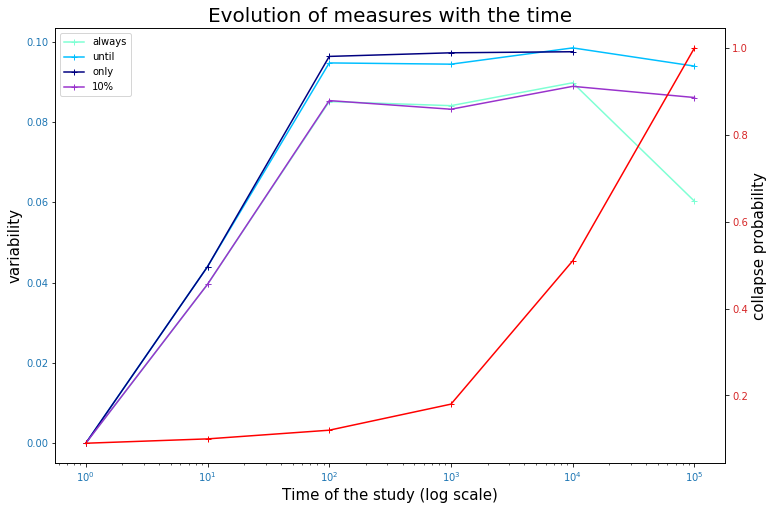

In [19]:
plt.figure(figsize=(12, 8))

plt.semilogx(FinalTime, Variability_always, "+-", label="always", color = "aquamarine")
plt.semilogx(FinalTime, Variability_until, "+-", label="until", color = "deepskyblue")
plt.semilogx(FinalTime, Variability_only, "+-", label="only", color = "navy")
plt.semilogx(FinalTime, Variability_10, "+-", label="10%", color = "darkorchid")
plt.xlabel("Time of the study (log scale)", fontsize=15)
plt.ylabel("variability", fontsize=15)
plt.legend()
plt.tick_params(labelcolor = 'tab:blue')

plt.twinx()    
plt.semilogx(FinalTime, Collapse, "+-", label="collapse probability", color = "red")
plt.tick_params(labelcolor = 'tab:red')    
plt.xlabel("Time of the study (log scale)", fontsize=15)
plt.ylabel("collapse probability", fontsize=15)


plt.title("Evolution of measures with the time", fontsize=20)
plt.savefig("plot/measures/Measures_over_time")
plt.show()

### Study of the impact of fire frequency

In [22]:
Freq = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

finalTime = 500

Collapse = np.zeros(len(Freq))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)

for i, freq in enumerate(Freq):
    Param_freq = {"p":freq}
    Fire["param_freq"] = Param_freq
    Collapse[i], Variability_always[i], Variability_until[i], Variability_only[i], Variability_10[i] = all_measure(Number_of_simulation = 100, Fire = Fire, finalTime = finalTime) 

/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/azer/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/azer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


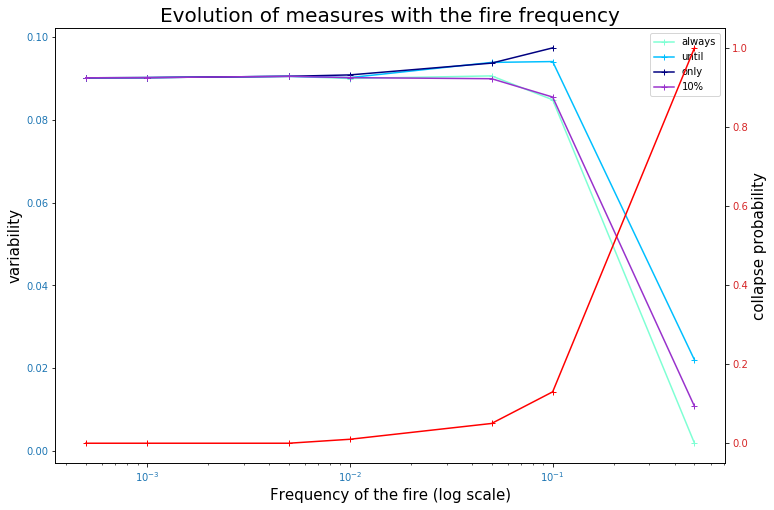

In [27]:
plt.figure(figsize=(12, 8))

plt.semilogx(Freq, Variability_always, "+-", label="always", color = "aquamarine")
plt.semilogx(Freq, Variability_until, "+-", label="until", color = "deepskyblue")
plt.semilogx(Freq, Variability_only, "+-", label="only", color = "navy")
plt.semilogx(Freq, Variability_10, "+-", label="10%", color = "darkorchid")
plt.xlabel("Frequency of the fire (log scale)", fontsize=15)
plt.ylabel("variability", fontsize=15)
plt.legend()
plt.tick_params(labelcolor = 'tab:blue')

plt.twinx()    
plt.semilogx(Freq, Collapse, "+-", label="collapse probability", color = "red")
plt.tick_params(labelcolor = 'tab:red')    
plt.xlabel("Frequency of the fire (log scale)", fontsize=15)
plt.ylabel("collapse probability", fontsize=15)


plt.title("Evolution of measures with the fire frequency", fontsize=20)
plt.savefig("plot/measures/Measures_over_frequency")
plt.show()

# cp over variability

In [128]:
#Freq = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
Freq = [0.001, 0.01, 0.05, 0.1]

finalTime = 100
Number_of_simulation = 100
numbreDePoint = 20
Color = ["blue", "g", "red", "orange", "pink", "black", "magenta"]

Param_ampl = {"scale":0.2}
Fire["param_ampl"] = Param_ampl

Collapse = np.zeros((numbreDePoint, len(Freq), Number_of_simulation))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)
Collapse_10_b = np.zeros_like(Collapse)
Collapse_10_m = np.zeros_like(Collapse)

for j in range(numbreDePoint):
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire["param_freq"] = Param_freq
        Collapse[j,i], Variability_always[j,i], Variability_until[j,i], Variability_only[j,i], Variability_10[j,i], Collapse_10_b[j,i], Collapse_10_m[j,i] = all_measure(Number_of_simulation = Number_of_simulation, mean = False, Fire = Fire, finalTime = finalTime) 

In [140]:
for i, freq in enumerate(Freq):
    print("\nThe collapse probability à the time 10% for the frequency : "+str(freq)+" is ", Collapse_10_b[:,i,:].mean(), " and the average of the density is ", Collapse_10_m[:,i,:].mean())


The collapse probability à the time 10% for the frequency : 0.001 is  0.0005  and the average of the density is  0.9665702349722095

The collapse probability à the time 10% for the frequency : 0.01 is  0.006  and the average of the density is  0.9460916809414862

The collapse probability à the time 10% for the frequency : 0.05 is  0.0525  and the average of the density is  0.8412966226749745

The collapse probability à the time 10% for the frequency : 0.1 is  0.108  and the average of the density is  0.7149585167182435


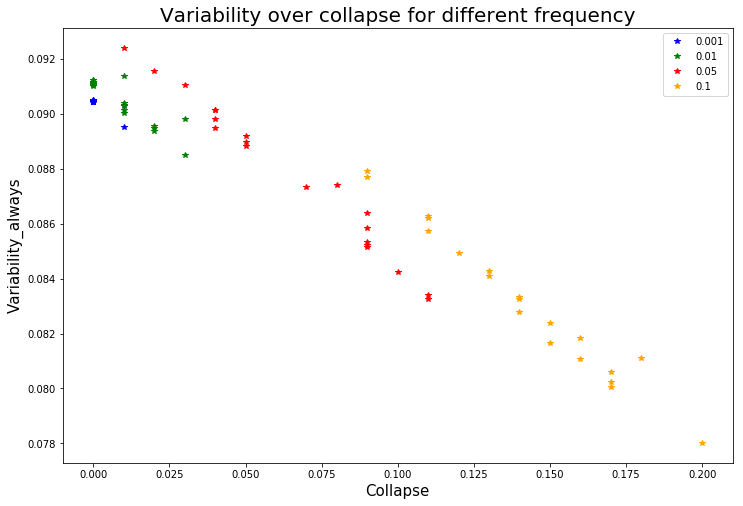

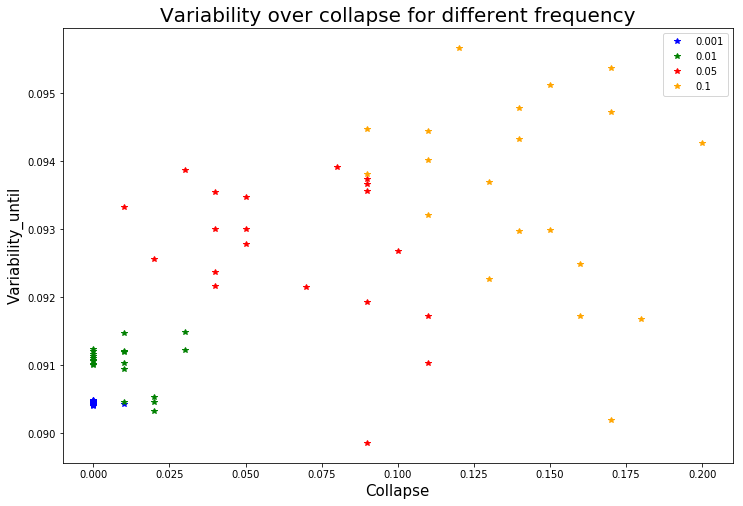

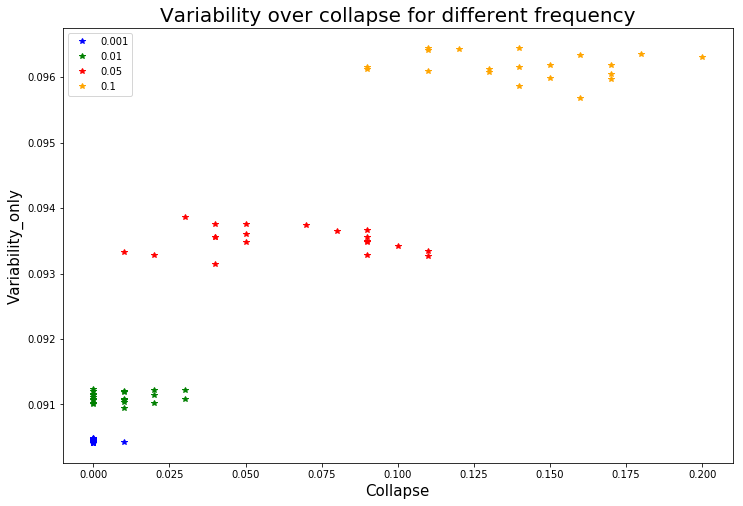

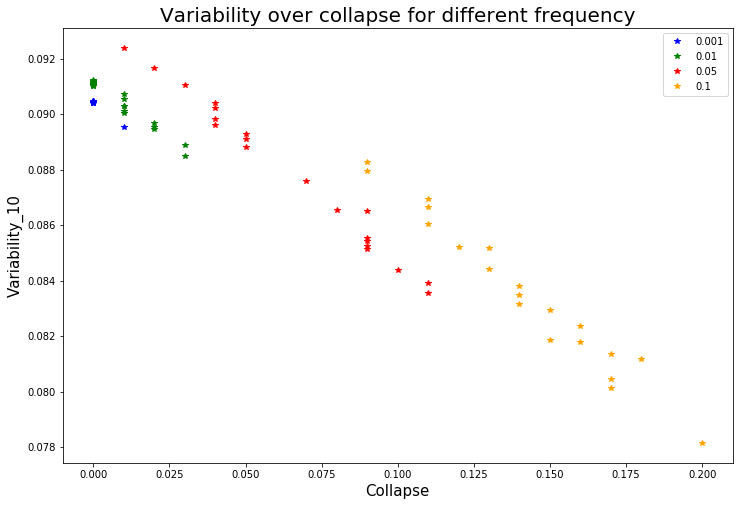

In [130]:
Compute_variability = {"Variability_always": Variability_always,
                        "Variability_until": Variability_until, 
                        "Variability_only":Variability_only,
                        "Variability_10":Variability_10}
"""
Ymin = []
Ymax = []
for k, compute_variability in enumerate(Compute_variability.keys()):
    mm = np.nanmean(Compute_variability[compute_variability], axis = 2)
    Ymin += [np.min(mm)]
    Ymax += [np.max(mm)]

ymin = np.nanmin(Ymin)
ymax = np.nanmin(Ymax)
"""


for k, compute_variability in enumerate(Compute_variability.keys()):
    plt.figure(figsize=(12, 8))
    for j in range(numbreDePoint):
        for i, freq in enumerate(Freq):
#        for i, freq in enumerate(Freq):
            if(j==0):
                plt.plot(np.nanmean(Collapse[j,i]), np.nanmean(Compute_variability[compute_variability][j,i]), "*", color = Color[i], label=str(freq))
            else:
                plt.plot(np.nanmean(Collapse[j,i]), np.nanmean(Compute_variability[compute_variability][j,i]), "*", color = Color[i])

    plt.xlabel("Collapse", fontsize=15)
    plt.ylabel(compute_variability, fontsize=15)
  #  plt.ylim(ymin, ymax)
    plt.legend()

    plt.title("Variability over collapse for different frequency", fontsize=20)
    plt.savefig("plot/measures/"+compute_variability+"_over_collapse_4")
    plt.show()

### on the same figure

## measures over amplitude

In [6]:
Ampl = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

finalTime = 500
Number_of_simulation = 100
Collapse = np.zeros(len(Ampl))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)

for i, ampl in enumerate(Ampl):
    Param_ampl = {"scale":ampl}
    Fire["param_amplitude"] = Param_ampl
    Collapse[i], Variability_always[i], Variability_until[i], Variability_only[i], Variability_10[i] = all_measure(Number_of_simulation = Number_of_simulation, mean = True, Fire = Fire, finalTime = finalTime) 

C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


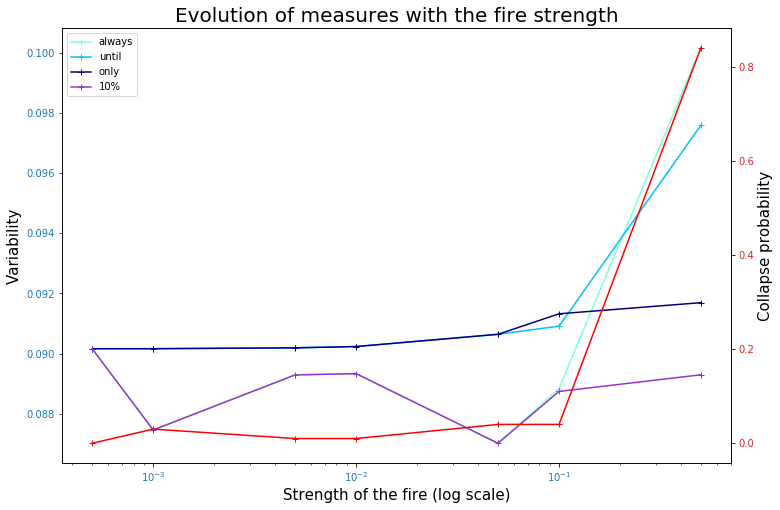

In [9]:
plt.figure(figsize=(12, 8))

plt.semilogx(Ampl, Variability_always, "+-", label="always", color = "aquamarine")
plt.semilogx(Ampl, Variability_until, "+-", label="until", color = "deepskyblue")
plt.semilogx(Ampl, Variability_only, "+-", label="only", color = "navy")
plt.semilogx(Ampl, Variability_10, "+-", label="10%", color = "darkorchid")
plt.xlabel("Strength of the fire (log scale)", fontsize=15)
plt.ylabel("Variability", fontsize=15)
plt.legend()
plt.tick_params(labelcolor = 'tab:blue')

plt.twinx()    
plt.semilogx(Ampl, Collapse, "+-", label="collapse probability", color = "red")
plt.tick_params(labelcolor = 'tab:red')    
plt.xlabel("Strength of the fire (log scale)", fontsize=15)
plt.ylabel("Collapse probability", fontsize=15)


plt.title("Evolution of measures with the fire strength", fontsize=20)
plt.savefig("plot/measures/Measures_over_amplitude")
plt.show()

## Impact of both freq and scale

In [11]:
Freq = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
Ampl = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.8]

Param_freq = {"p":0.01}
Param_ampl = {"scale":0.07}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}

finalTime = 500
Number_of_simulation = 100
Collapse = np.zeros((len(Freq), len(Ampl)))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)

for i, freq in enumerate(Freq):
    for j, ampl in enumerate(Ampl):
        Param_ampl = {"scale":ampl}
        Fire["param_amplitude"] = Param_ampl
        Param_freq = {"p":freq}
        Fire["param_freq"] = Param_freq
        Collapse[i,j], Variability_always[i,j], Variability_until[i,j], Variability_only[i,j], Variability_10[i,j] = all_measure(Number_of_simulation = Number_of_simulation, mean = True, Fire = Fire, finalTime = finalTime) 

C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice


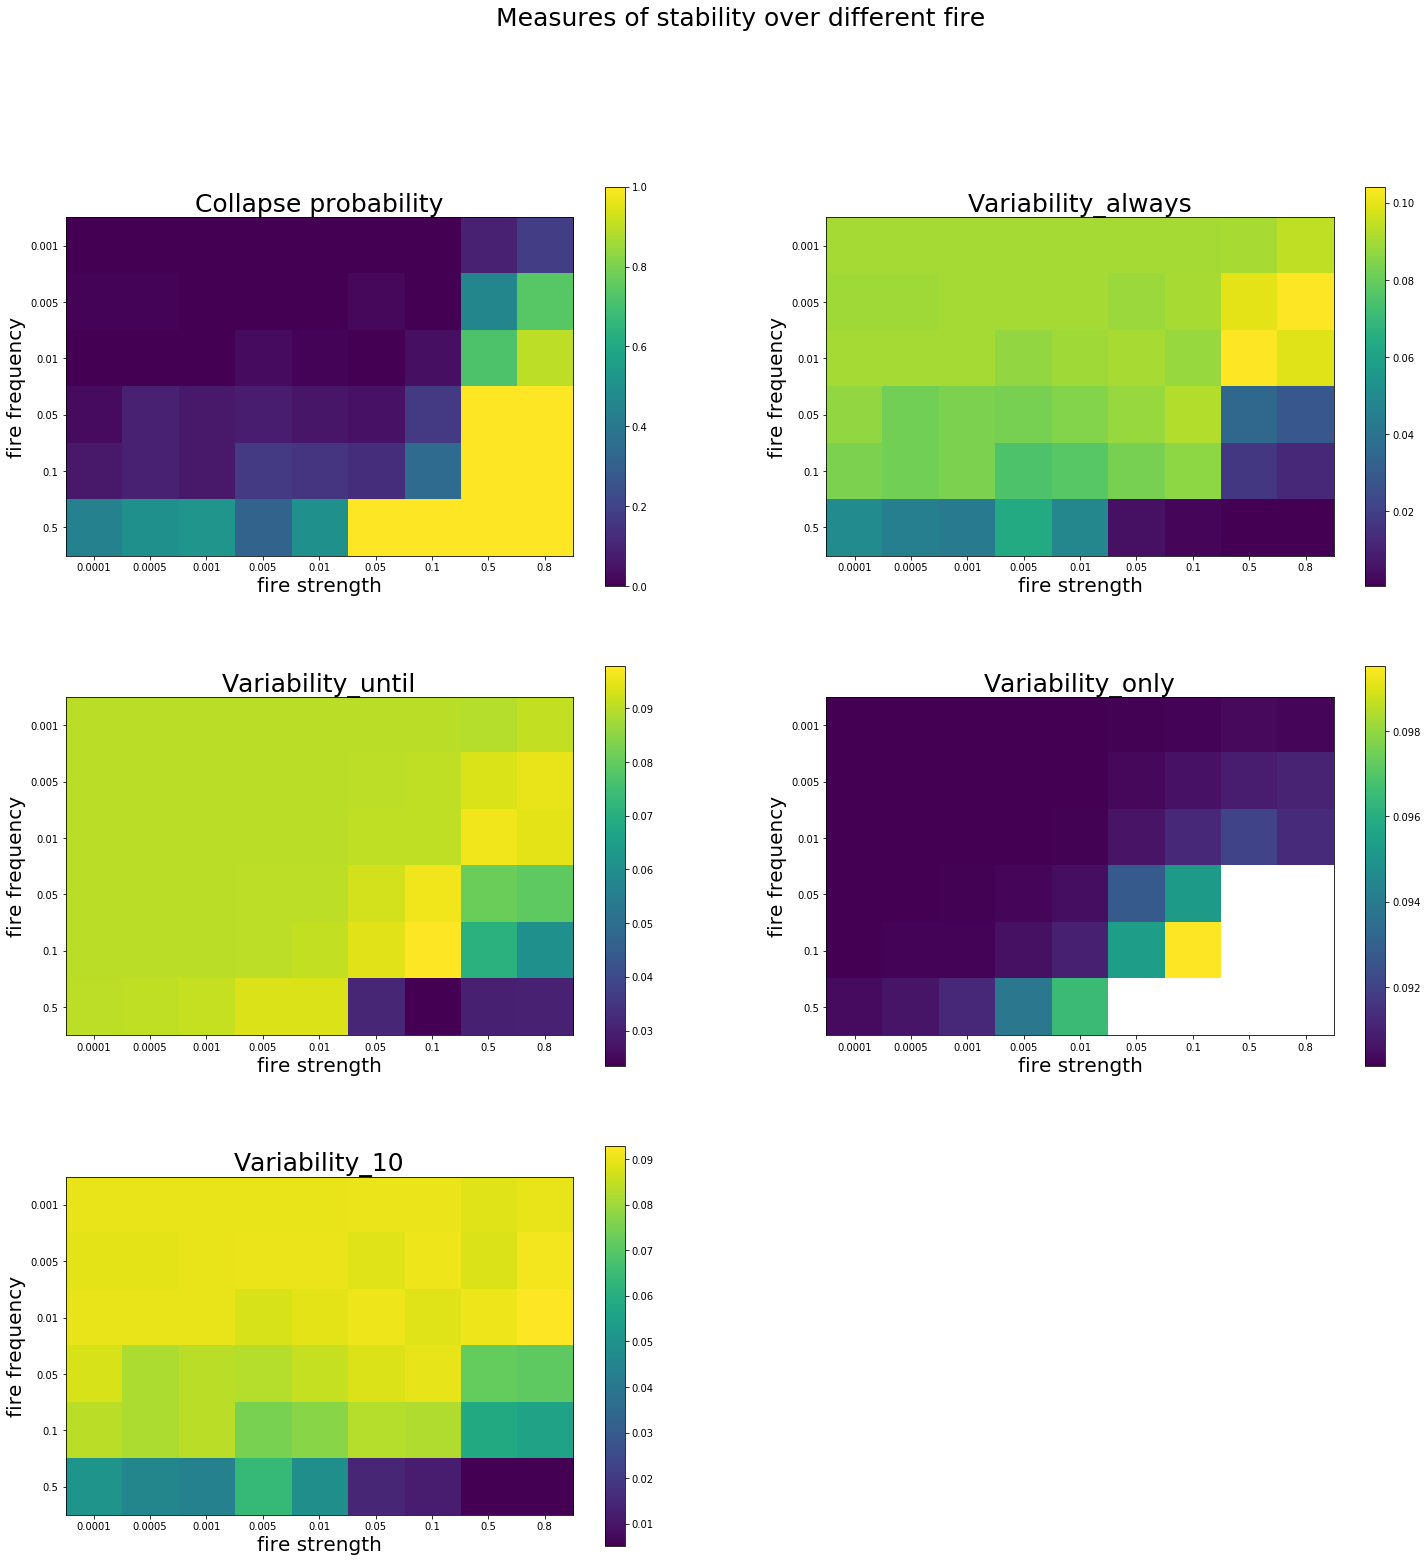

In [26]:
plt.figure(figsize = (25, 25))
plt.suptitle("Measures of stability over different fire", fontsize=30)

Compute_measures = {"Collapse probability": Collapse,
                    "Variability_always": Variability_always,
                    "Variability_until": Variability_until, 
                    "Variability_only":Variability_only,
                    "Variability_10":Variability_10}

for i, compute_measures in enumerate(Compute_measures.keys()):
    plt.subplot(3,2,i+1)
    plt.imshow(Compute_measures[compute_measures])
    plt.xticks(np.arange(len(Ampl)), Ampl)
    plt.yticks(np.arange(len(Freq)), Freq)
    plt.colorbar()
    plt.title(compute_measures, fontsize=25)
    plt.ylabel("fire frequency", fontsize=20)
    plt.xlabel("fire strength", fontsize=20)
plt.savefig("plot/measures/Measures_over_freq_amplitude")